In [61]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time
import numpy as np

random.seed(100)

In [62]:
### Data Preprocessing ###

dataset = pd.read_csv('/Users/swagataashwani/Desktop/MachineLearningTemplate/Eye_Surgery_Case_study/new_eye.csv')


In [63]:
dataset.head()

,patient_insurance,patient_sex,success,surgeon_id,over_under_correction,treatment,initial_severity,age
0,D,1,1,18,NaN,1,1,50
1,I,1,1,17,NaN,0,1,21
2,A,1,1,8,NaN,0,1,45
3,D,1,1,8,NaN,1,1,37
4,B,1,1,9,NaN,0,0,49


In [64]:
# Encoding NAN 
dataset['over_under_correction']=  dataset['over_under_correction'].replace(np.nan, 0)
cols = ['over_under_correction']
dataset[cols] = dataset[cols].applymap(np.int64)

In [65]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)
dataset.columns

# Removing extra columns
response = dataset["treatment"]
dataset = dataset.drop(columns = ["treatment"])

In [66]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)


In [67]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [68]:
#### Model Building ####

### Comparing Models

## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0, penalty = 'l1')
classifier1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
# Predicting Test Set
y_pred = classifier1.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [70]:
print(results)

                       Model  Accuracy  Precision    Recall  F1 Score
0  Linear Regression (Lasso)  0.762857   0.767164  0.744928  0.755882


In [71]:
## SVM (Linear)
from sklearn.svm import SVC
classifier2 = SVC(random_state = 0, kernel = 'linear')
classifier2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
# Predicting Test Set
y_pred = classifier2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [73]:
print(results)

                       Model  Accuracy  Precision    Recall  F1 Score
0  Linear Regression (Lasso)  0.762857   0.767164  0.744928  0.755882
1               SVM (Linear)  0.762857   0.767164  0.744928  0.755882


In [74]:
## SVM (rbf)
from sklearn.svm import SVC
classifier3 = SVC(random_state = 0, kernel = 'rbf')
classifier3.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
# Predicting Test Set
y_pred = classifier3.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [76]:
print(results)

                       Model  Accuracy  Precision    Recall  F1 Score
0  Linear Regression (Lasso)  0.762857   0.767164  0.744928  0.755882
1               SVM (Linear)  0.762857   0.767164  0.744928  0.755882
2                  SVM (RBF)  0.757143   0.762763  0.736232  0.749263


In [77]:
## SVM (rbf)
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [78]:
# Predicting Test Set
y_pred = classifier4.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [79]:
print(results)

                       Model  Accuracy  Precision    Recall  F1 Score
0  Linear Regression (Lasso)  0.762857   0.767164  0.744928  0.755882
1               SVM (Linear)  0.762857   0.767164  0.744928  0.755882
2                  SVM (RBF)  0.757143   0.762763  0.736232  0.749263
3      Random Forest (n=100)  0.697143   0.691643  0.695652  0.693642


In [84]:

## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X= X_train, y = y_train,
                             cv = 10)
print("Best Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))



Best Classifier Accuracy: 0.76 (+/- 0.05)


Test Data Accuracy: 0.6971


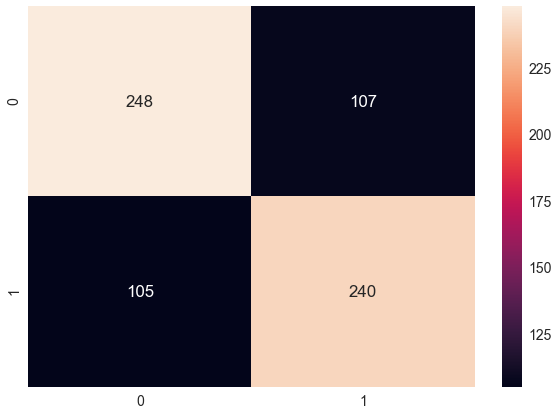

In [81]:
## Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

